<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Exploratory Data Analysis of Credit Card Data</span>  </h1> 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats       # For Statistical Analysis

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer 

%matplotlib inline


In [2]:
df = pd.read_csv('Credit_data.csv')

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the given data.')

There are 245725 rows and 11 columns in the given data.


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Column Description</span>  </h1>

To understand our columns better, we need their respective descriptions. The image below describes the columns.

<img src = "Column Description.jpg" style = "width: 350px; height: 400px"/>

In [3]:
df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Datatype Information</span>  </h1>

In [4]:
df.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [5]:
df.dtypes.value_counts()

object    7
int64     4
dtype: int64

In [6]:
print(f'There are {df.dtypes.value_counts()[0]} "Object" (Categorical) variables and {df.dtypes.value_counts()[1]} "int64" (Numerical) variables.')

There are 7 "Object" (Categorical) variables and 4 "int64" (Numerical) variables.


In the description of the columns, we realise that 'Vintage' column is in months, so we change it into years.

In [7]:
del(df['ID'])   ## Deleting the ID column as it has all the unique value and would not be used further

$\textbf{'Is_Lead'}$ column has values stored as '0' and '1'. Creating a new column which maps these values to something meaningful to the viewer.

In [8]:
df['Is_Lead_class'] = df['Is_Lead'].map({ 0: 'Not Interested', 1: 'Interested'})

df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Is_Lead_class
0,Female,73,RG268,Other,X3,43,No,1045696,No,0,Not Interested
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Not Interested
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Not Interested
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Not Interested
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Not Interested


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Categorical Vs Numerical Columns</span>  </h1>

In [9]:
## Selecting Categorical and Numerical Columns 

cat_cols = df.select_dtypes(include = np.object).columns.tolist() ## Removing ID as it is not really needed
num_cols = df.select_dtypes(exclude = np.object).columns.tolist()

print('******************************Categorical Columns****************************')
print(cat_cols)
print(' ')
print('******************************Numerical Columns****************************')
print(num_cols)

******************************Categorical Columns****************************
['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead_class']
 
******************************Numerical Columns****************************
['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']


<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Class Imbalance</span>  </h1>

In [10]:
df['Is_Lead_class'].value_counts(normalize = True)

Not Interested    0.762792
Interested        0.237208
Name: Is_Lead_class, dtype: float64

There is a $\textbf{class imbalance}$ in our data as the number of the "Interested" and "Not Interested" is not in the same proportion. This may $\textbf{lead to inefficiency and baisness}$ in our ML Model during the training. We would deal with this while building the model.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Univariate Analysis</span>  </h1>

In [11]:
def UVA_numeric(data, var_group):    ## For Numerical Variables ##
    ''' 
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size, 3), dpi = 100)
  
     #looping for each variable
    for j,i in enumerate(var_group):
    
      # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

    # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(x = data[i], shade=True)
        sns.lineplot(x = points, y = [0, 0], color = 'green', label = "std_dev")
        sns.scatterplot(x = [mini,maxi], y = [0, 0], color = 'orange', label = "min/max")
        sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
        sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                    round(kurt,2),
                                                                                                    round(skew,2),
                                                                                                    (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                    round(mean,2),
                                                                                                    round(median,2)))

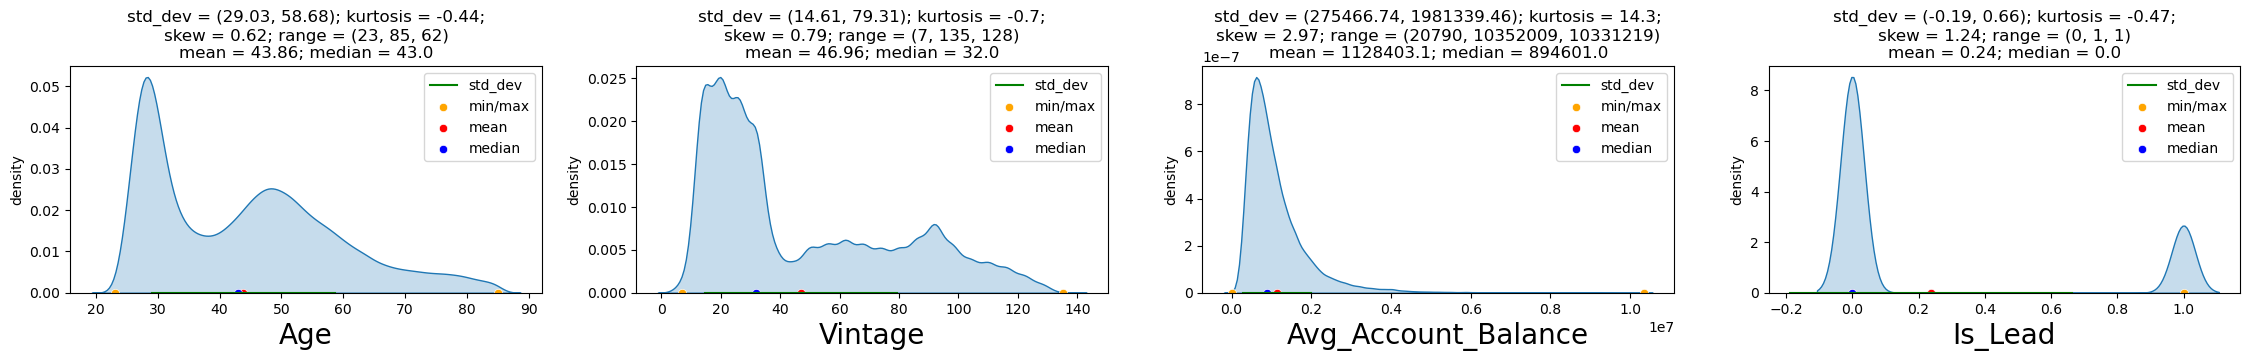

In [12]:
UVA_numeric(df, num_cols)

In above plots, it can be observed that the skewness is greater than 0.5 for all the numerical variables. Hence, 'Age', 'Vintage', 'Avg_Account_balance' and 'Is_Lead' columns are Right Skewed (Postive Skewed).

$$\underline{\textbf{Summary of Numerical variables}}: $$

$\textbf{1. Age}$:

   * The value of skewness is slightly greater than 0.5, which makes it Right Skewed but not too significantly. Age is a little biased towards the young (below 35) age. Also, the value of Mean and Median is quite close to each other. Categorising (and binning) the age variable, might be helpful in achieving a normal distribution.
    
   * Kurtosis = - 0.44, very less likely to have outliers/extreme values.
    
$\textbf{2. Vintage}$:

   * The value of skewness (0.79) is greater than 0.5, which makes it Right Skewed. Vintage is a little biased towards the early vintage customers. Also, the value of Mean and Median is a little far from to each other. 
    
   * Kurtosis = - 0.7, less likely to have outliers/extreme values.
    
$\textbf{3. Avg_Account_Balance}$:
    
   * The value of skewness (2.97) is significantly greater than 0.5, which makes it highly skewed towards right. The variable is heavily biased towards the high earning individuals. Also, the value of Mean and Median is a far from to each other. 
    
   * Kurtosis = 14.3 , higly likely to have outliers/extreme values.
    

$\textbf{4. Is_Lead}$:
    
   * The value of skewness (1.24) is significantly greater than 0.5, which makes it highly skewed towards right as the higher peak is towards left. The variable is biased towards the customers who are not interested in the Credit Card. Also, the value of Mean and Median is a far from to each other. 
    
   * Kurtosis = -0.47, does not really matter here as our value is discrete, i.e., 0 and 1.
    
    

$\textbf{Further Steps:}$: Outlier Treatment on 'Avg_Account_Balance' may be helpful in getting a normal distribution and then performing the Analysis would be better.

In [13]:
# standard deviation factor
factor = 3


# copying the entire data
cm_data = df.copy()


# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['Avg_Account_Balance'] < factor*cm_data['Avg_Account_Balance'].std()]

# checking how many points removed
len(df), len(cm_data['Avg_Account_Balance'])

(245725, 231873)

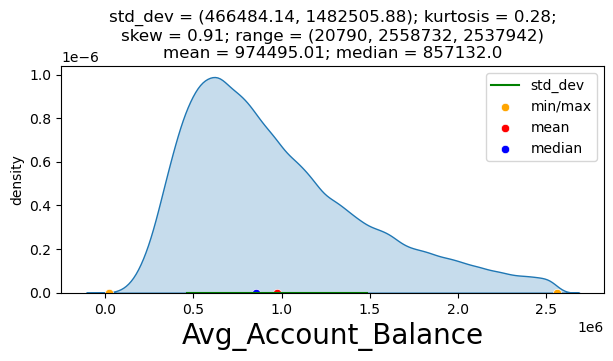

In [14]:
UVA_numeric(cm_data, ['Avg_Account_Balance'])

After removing the outliers, the distribution of 'Avg_Account_Balance' has improved significantly as the value of Kurtosis and skewness has descreased. The values of Mean and Median are also closer, but still the distribution is skewed towards right. We can further analyse this more.

In [15]:
def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()

    #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

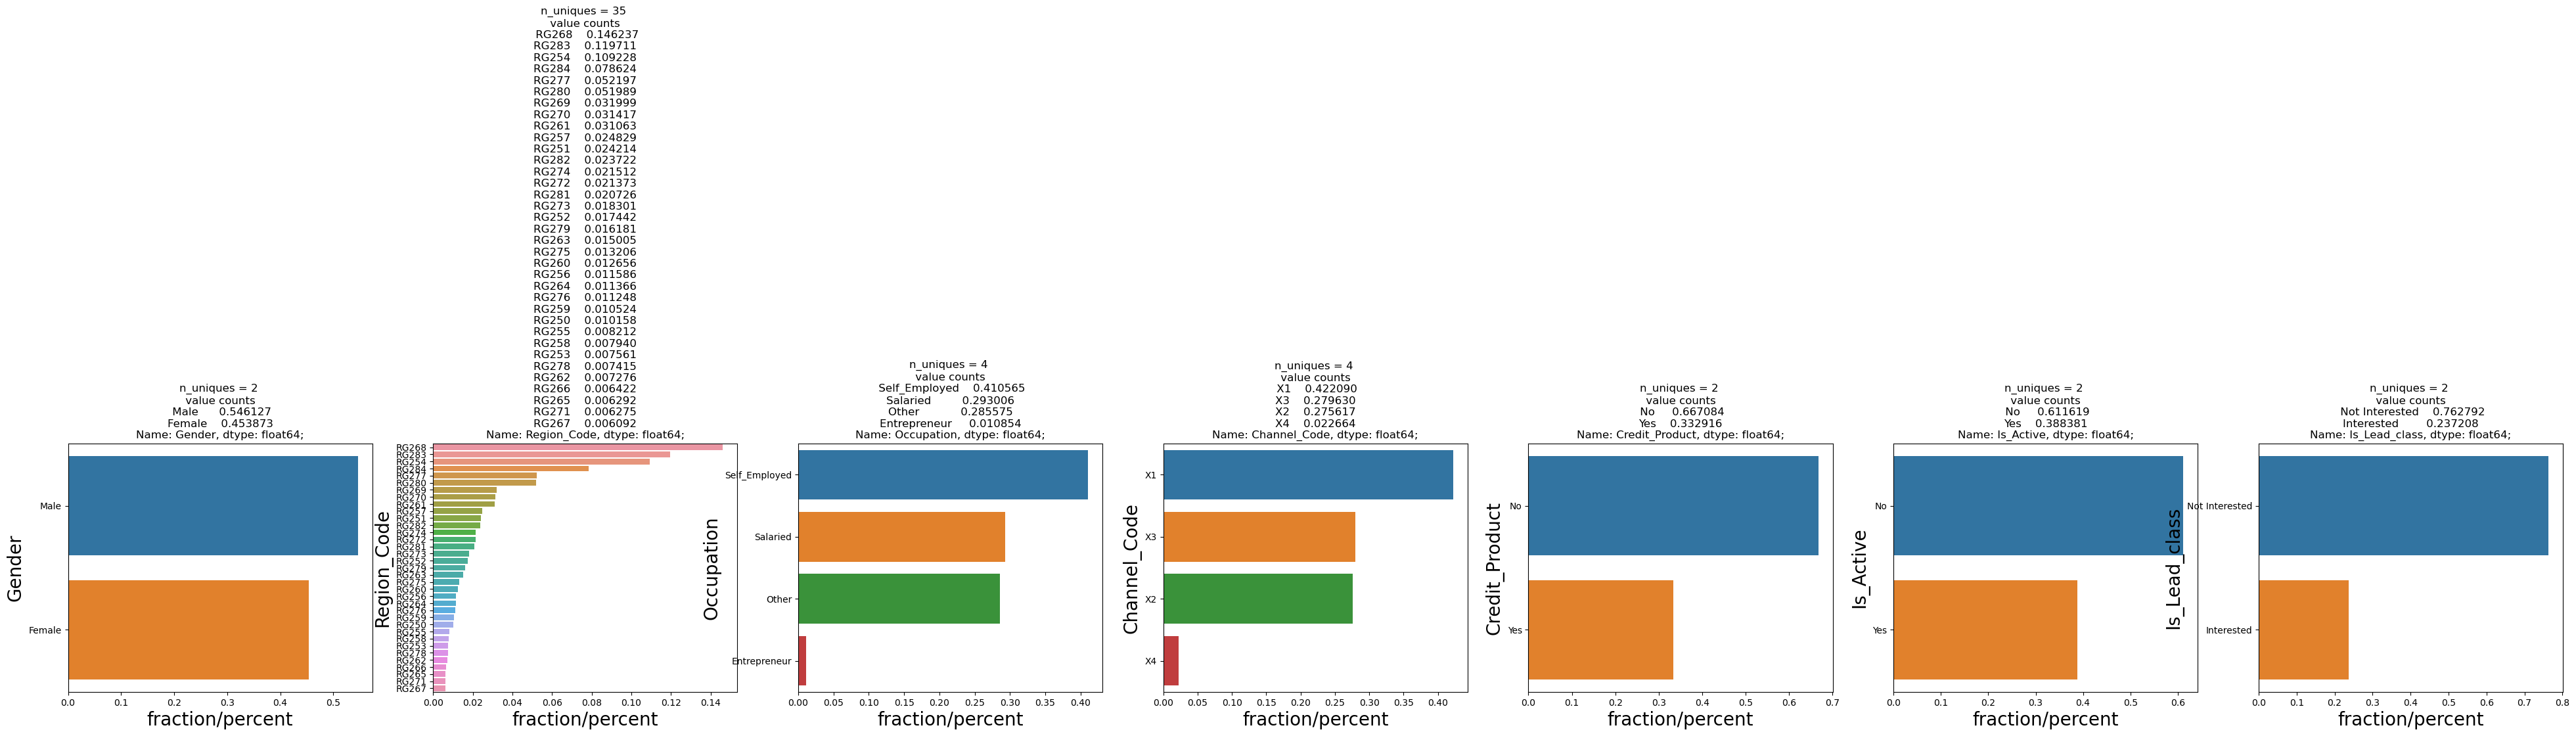

In [16]:
UVA_category(df, cat_cols)

$$\underline{\textbf{SUMMARY}}$$

$\textbf{Gender}$
  * Male customers are aprroximately 1.2 times the number of females.

$\textbf{Region_Code}$
  *  RG268, RG283, RG254, RG284 have maximum number of values. The regions with smaller values can be clubed together, but we have to keep in mind that the overall distribution must not be effected.

$\textbf{Occupation}$
  *  Majority of the data comprises Self-employed and salaried (41%, 29% respectively).
  * Entrepreneurs have a very small percentage of the values (around 1%). It is suggestive to remove them from the data unless, they serve a significantly high amount of account balance.

$\textbf{Channel Code}$
  *  Maximum customer are being acquisition is coming from channel X1 (42%) followed by X2 and X3 having nearly equal acquisition (27.9 %, 27.5%). 
  * X4 channel has minimum acquisition (2.26 %). Instead of making it a different subcategory, we can merge it with X3.

$\textbf{Credit Product}$
  *  Around 67% of the customers are no active credit product (home loan, credit card, personal loan etc). 
  * X4 channel has minimum acquisition (2.26 %). Instead of making it a different subcategory, we can merge it with X3.
  
$\textbf{Is_active}$
  *  Surprisingly, the around 61% of the customers are active in last 3 months. 
  * X4 channel has minimum acquisition (2.26 %). Instead of making it a different subcategory, we can merge it with X3.
  

$$\underline{\textbf{Things to investigate further}}$$

$\textbf{1.}$ Credit Products may be a big reason for nearly same percent of bank accounts being active in last 3 months.

$\textbf{2.}$ The remaining skewness in the 'Avg_Account_Balance' may be due to the presence of entrepreneurs who are in very small numbers but may have larger values of income.

$\textbf{3.}$ There may be a relation between Region_code and Channel_code, as the regions performing better may be belonging to the channel_code where the values are maximum and vice versa.

$\textbf{4.}$ The customers interested in the Credit Cards may belong to particular regions, where the number of acquisitions may be higher (Region_code and Is_Lead correlated)

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Univariate Analysis (Missing Values)</span>  </h1>

In [17]:
df.isna().sum()/len(df) *100

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
Is_Lead_class           0.000000
dtype: float64

It can be seen that Credit_Product column has $\textbf{11.93 (~ 12%) missing values}$. Rest of the columns do not have any missing values.


$$\underline{\textbf{Things to investigate further}}$$

$\textbf{1.}$ Do the missing values in the Credit_Product column have some common behaviour with the interest in the Credit Card (i.e., Is_Lead column)? Is it possible to impute them without effecting the statistics of our data much?

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Univariate Analysis (Outliers)</span>  </h1>

In [18]:
def UVA_outlier(data, var_group, include_outlier = True):   # Default condition is to include outliers
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)
  
    #looping for each variable
    for j,i in enumerate(var_group):
    
      # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])

        if include_outlier == True:
      #Plotting the variable with every information
            plt.subplot(1,size,j+1)
            sns.boxplot(data[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
        else:
      # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high+1
            data2[i][data2[i]<whis_low] = whis_low-1
      
     # plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data2[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

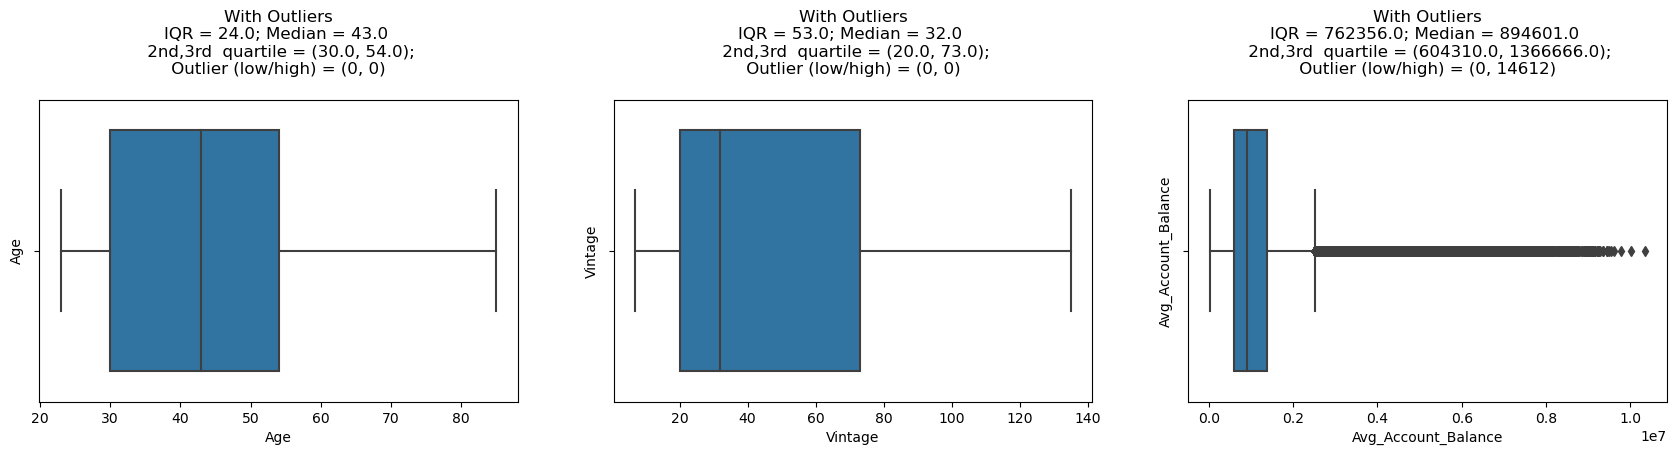

In [19]:
UVA_outlier(df, ['Age', 'Vintage', 'Avg_Account_Balance'], include_outlier = True )

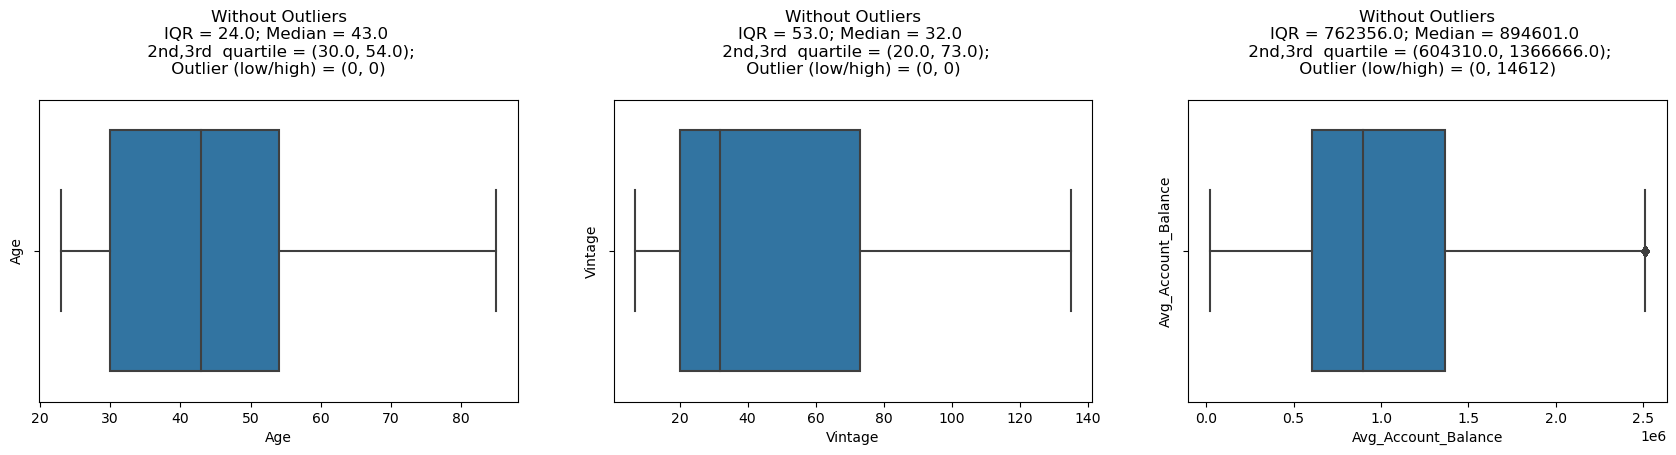

In [20]:
UVA_outlier(df, ['Age', 'Vintage', 'Avg_Account_Balance'], include_outlier = False )

After outlier removal, the statistics and boxplot for Age and Vintage have no difference, but 'Avg_account_Balance' look much more like a normal distribution. 

But it can be still seen that there us a value at 2.5 million, which is very near to the higher whisker. We can look into it further.


$$\underline{\textbf{Findings from Univariate Analysis}}$$

$\textbf{1.}$ Are the people whose account have not been active in last 3 months, the ones who are not interested in Credit Card?

$\textbf{2.}$ Do the missing values in the Credit_Product column have some common behaviour with the interest in the Credit Card (i.e., Is_Lead column)? Is it possible to impute them without effecting the statistics of our data much?

$\textbf{3.}$ Credit Products may be a big reason for nearly same percent of bank accounts being active in last 3 months.

$\textbf{4.}$ The remaining skewness in the 'Avg_Account_Balance' may be due to the presence of entrepreneurs who are in very small numbers but may have larger values of income.

$\textbf{5.}$ There may be a relation between Region_code and Channel_code, as the regions performing better may be belonging to the channel_code where the values are maximum and vice versa.

$\textbf{6.}$ The customers interested in the Credit Cards may belong to particular regions, where the number of acquisitions may be higher (Region_code and Is_Lead correlated)

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Bivariate Analysis (Numerical-Numerical)</span>  </h1>

## Correlation Matrix

In [21]:
# calculating correlation
numerical = df[num_cols]

correlation = numerical.dropna().corr()
correlation

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


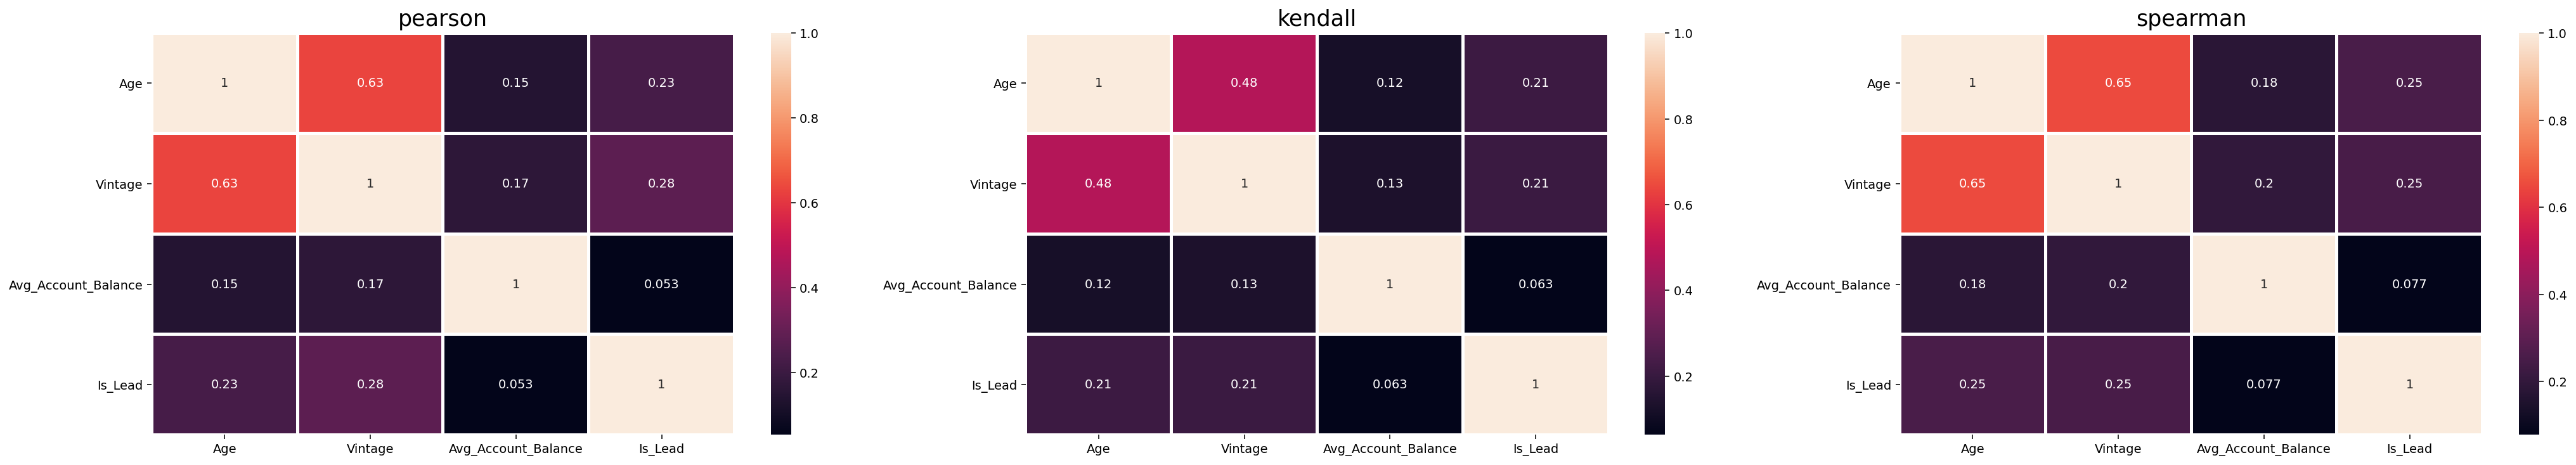

In [22]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize = (36, 6), dpi = 140)

for j, i in enumerate(['pearson', 'kendall', 'spearman']):
    plt.subplot(1, 3, j + 1)
    correlation = numerical.dropna().corr(method = i)
    sns.heatmap(correlation, linewidth = 2, annot = True)  ## annot shows the values of correlation also.
    plt.title(i, fontsize=18)

All the three heatmaps shows different values of correlation, with Pearson and Spearman having nearly same, i.e., 0.63 and 0.65 respectively for the Vintage and Age column, while Kendall shows a comparatively lower value of correlation, i.e., 0.48

But all the three methods, show correlation between Age and Vintage column. As we know that Age and Vintage column do not have outliers, let us make a pairplot to validate the correlation between them.

<Figure size 7000x840 with 0 Axes>

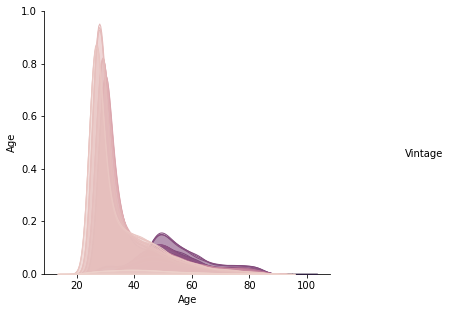

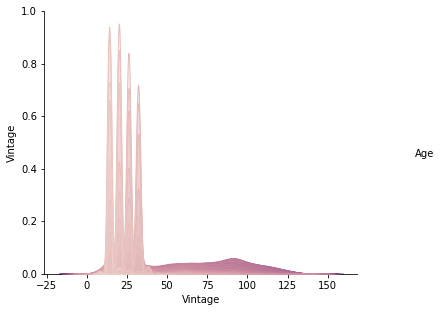

In [23]:
plt.figure(figsize = (50, 6), dpi = 140)
using = df[['Age', 'Vintage']]

output = sns.pairplot(using, hue = 'Vintage')    ## Here the hue is age
output_2 = sns.pairplot(using, hue = 'Age')

output.fig.set_size_inches(7,5)    # Output for 'Vintage' as hue
output_2.fig.set_size_inches(7,5)   # Output for 'Age' as hue


$$\underline{\textbf{Observation}}$$

   *    The above pairplot with age as "hue", validates our high correlation between the Age and Vintage variable, as it can be seen that ${Higher\,\,Age\,\,customers\,\,tend\,\,to\,\,have\,\,Higher\,\,Vintage\,\,values}$.
   * This high correlation can be used for feature engineering during the later stages.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Bivariate Analysis (Continuous-Categorical)</span>  </h1>

$$\underline{\textbf{Hypothesis Testing}}$$

$\textbf{1.}$ Are the Vintage Customers less likely to be interested in a Credit Card?

$\textbf{2.}$ Are the people whose account have not been active in last 3 months, the ones who are not interested in Credit Card?

$\textbf{3.}$ Do the missing values in the Credit_Product column have some common behaviour with the interest in the Credit Card (i.e., Is_Lead column)? Is it possible to impute them without effecting the statistics of our data much?

$\textbf{4.}$ Credit Products may be a big reason for nearly same percent of bank accounts being active in last 3 months.

$\textbf{5.}$ There may be a relation between Region_code and Channel_code, as the regions performing better may be belonging to the channel_code where the values are maximum and vice versa.

$\textbf{6.}$ The customers interested in the Credit Cards may belong to particular regions, where the number of acquisitions may be higher (Region_code and Is_Lead correlated)



In [24]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import norm

   # z = ((x_1bar - x_2bar) - (mu1- mu2))/ sqrt([sigma_1_2/n1 + sigma_2_2/n2])

    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))           # cdf is the Cumulative density function
    
    return pval

In [25]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))     # Takes degree of freedom and t-value
    
    return pval

In [26]:
def Bivariate_cont_cat(data, cont, cat, category):      ## Combination of the two functions above
  #creating 2 samples
    x1 = data[cont][data[cat]==category][:]       ## Filtering the categories
    x2 = data[cont][~(data[cat]==category)][:]
  
     #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.mean()
  
     #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #table
    table = pd.pivot_table(data = data, values = cont, columns = cat, aggfunc = np.mean)
    
      ## Creates a pivot table for our categorical Vs Continuous variables

    #plotting
    plt.figure(figsize = (15,6), dpi=140)
  
    #barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')
  

$$\underline{\textbf{1. Are Vintage Customers less likely to be interested in Credit Card?}}$$

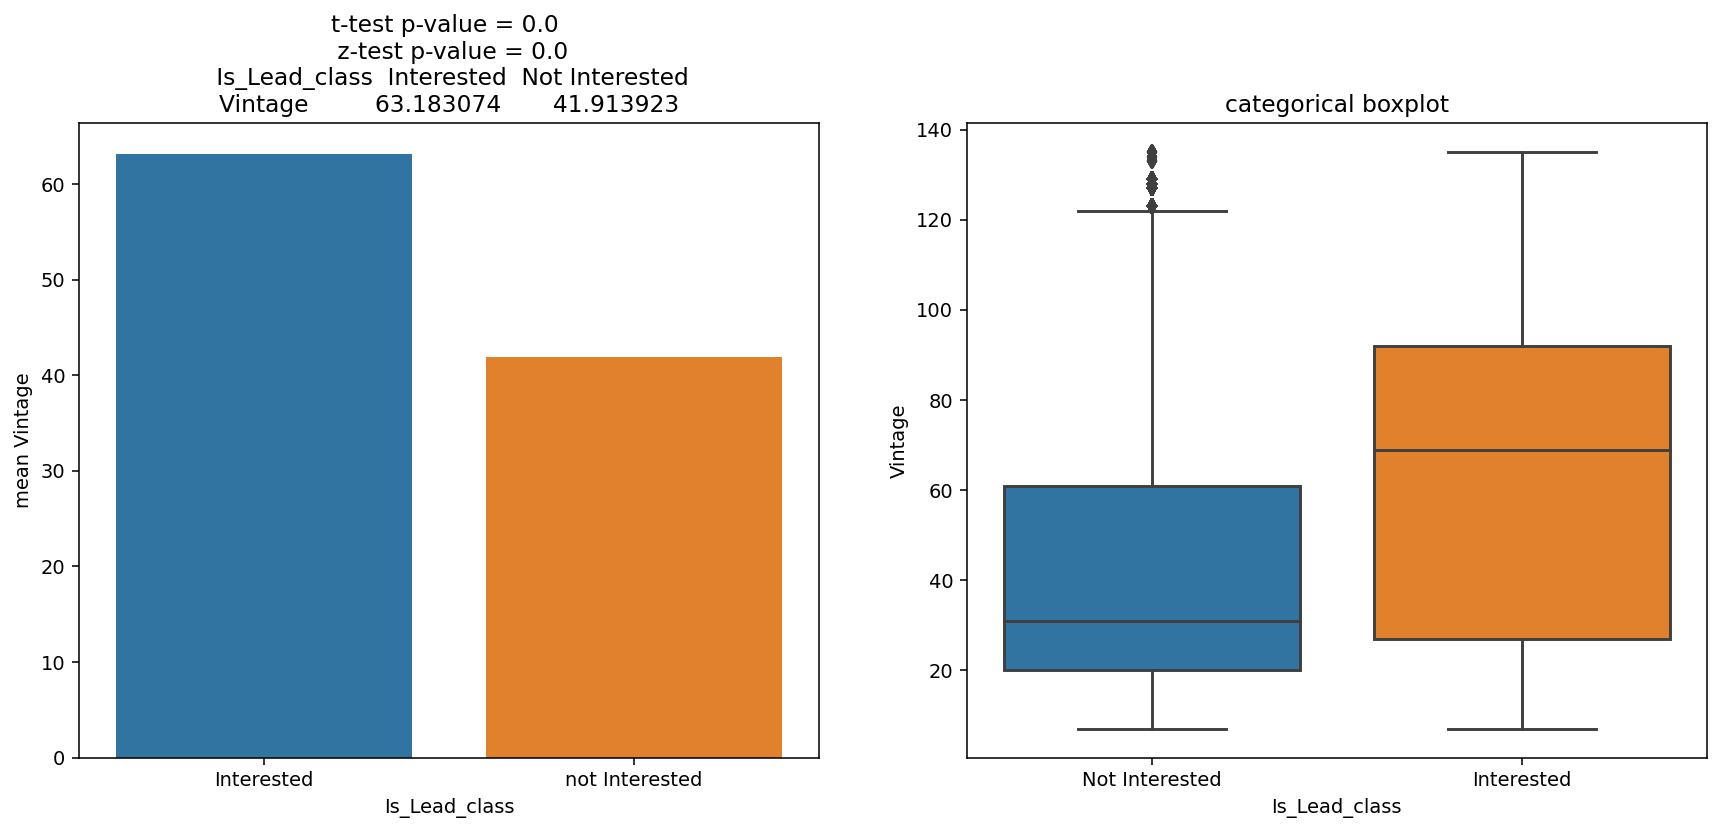

In [27]:
Bivariate_cont_cat(df, 'Vintage', 'Is_Lead_class', 'Interested')

$\underline{\textbf{Inferences}}$

1.    Most of the Vintage Customers (63.18%) are "Interested" for the card, while 41.91% are "Not Interested". Therefore, the difference between between Vintage "Interested" and "Not Interested" is significant (around 20%) and our p-values from the respective t-test and z-test are 0.

2.    Boxplot shows very similar distribution with outliers on the upper end for "Not Interested".

$\underline{\textbf{Result}}$

Hence, we can reject the null hypothesis that Vintage customers are less likely to be interested in credit cards.

$$\underline{\textbf{2. Are customers with higher average account balance "Not Interested" in Credit Card?}}$$

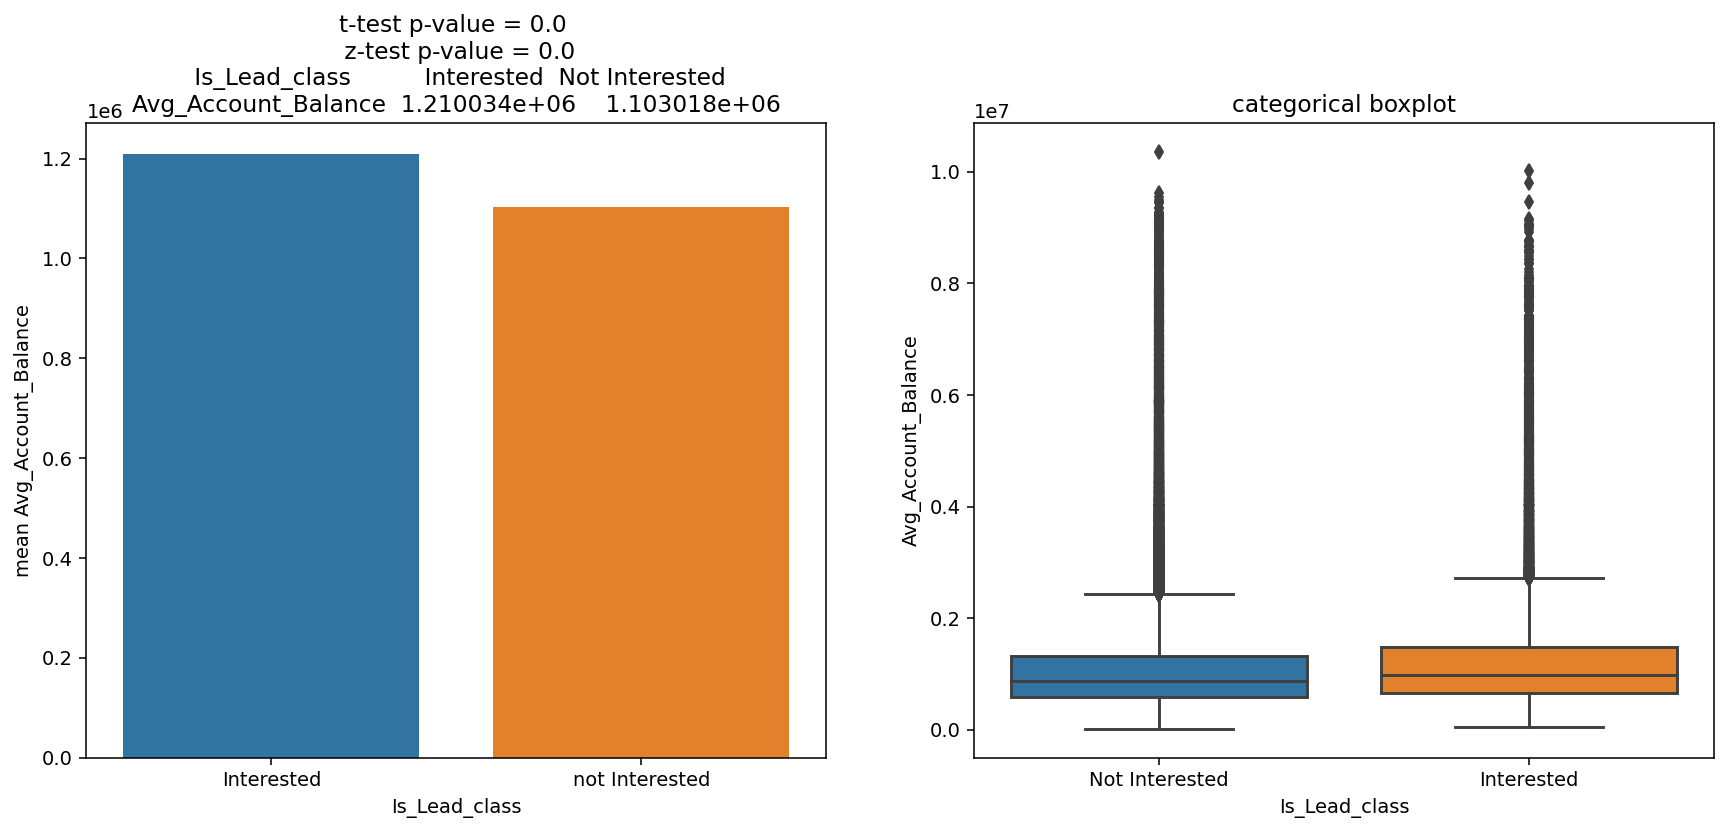

In [28]:
Bivariate_cont_cat(df, 'Avg_Account_Balance', 'Is_Lead_class', "Interested")

$\underline{\textbf{Inferences}}$

1.   The Avg_Account_Balance in both "Not Interested" and "Interested" customers is not significantly different.

2.    Boxplot also shows the similar behaviour in the distribution as well as the outliers.

$\underline{\textbf{Result}}$

Hence, we can accept the null hypothesis that the higher or lower "Avg_Account_Balance" of the customers does not imply their interest in Credit Card.

$$\underline{\textbf{3. Does the age of the customer play a role towards their "Interest" in Credit Cards?}}$$

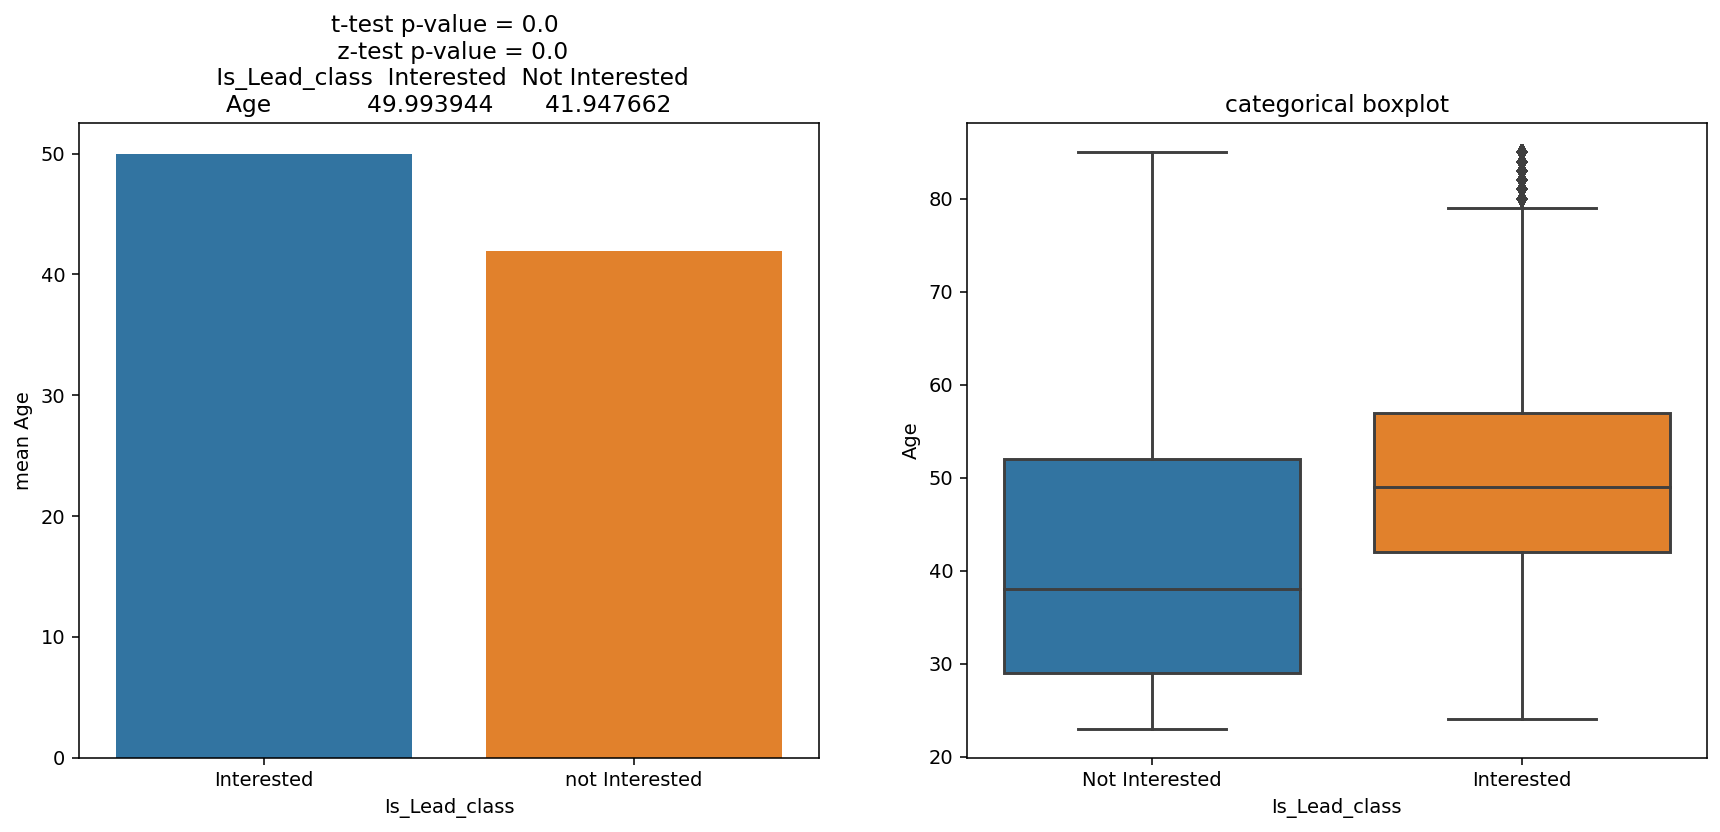

In [29]:
Bivariate_cont_cat(df, 'Age', 'Is_Lead_class', "Interested")

In [30]:
print(df['Age'][df['Is_Lead_class'] == 'Interested'].describe())  # Summary stats of Interested Customers
print('')
print(f"Median of 'Interested' Customers is {df['Age'][df['Is_Lead_class'] == 'Interested'].median()}")

count    58288.000000
mean        49.993944
std         12.884419
min         24.000000
25%         42.000000
50%         49.000000
75%         57.000000
max         85.000000
Name: Age, dtype: float64

Median of 'Interested' Customers is 49.0


In [31]:
print(df['Age'][df['Is_Lead_class'] == 'Not Interested'].describe()) # Summary stats of  Not-Interested Customers
print('')
print(f"Median of 'Not Interested' Customers is {df['Age'][df['Is_Lead_class'] == 'Not Interested'].median()}")

count    187437.000000
mean         41.947662
std          14.875771
min          23.000000
25%          29.000000
50%          38.000000
75%          52.000000
max          85.000000
Name: Age, dtype: float64

Median of 'Not Interested' Customers is 38.0


$\underline{\textbf{Inferences}}$

1.   From the above analysis, it can be clearly seen that mean is not a good criteria for observing these values, as presence of outliers in "Interested" customers makes it difficult to differentiate between both categories. So, we choose median as a metric here and observed that there is a significant difference of 11 years between "Interested" and "Not Interested" customers, with higher median age of "Interested" customers. This maybe due to their ("Interested" customers') better financial stability (due to factors like age, work experience, financial knowledge etc) as well as income streams which makes them more interested towards credit cards, while the contrary is true for "Not Interested" customers.


2.    Boxplot also shows the presence of many outliers in "Interested" customers further validating our assumption.

$\underline{\textbf{Result}}$

Hence, we can reject the null hypothesis that Age does not play any role in the "Interest" of the customers in Credit Card.

The hypothesis we have left for now, would be further looked forward in Bivariate Analysis of Categorical-Categorical Variables.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Bivariate Analysis (Categorical-Categorical)</span>  </h1>

$$\underline{\textbf{Hypothesis Testing}}$$

$\textbf{1.}$ Are Females less likely to show interest in Credit Card?

$\textbf{2.}$ Are customers not active for last 3 months less likely to show interest in the Credit Cards?

$\textbf{3.}$ Do the Channel_code, play a role in the Interest of the customer in Credit card?

$\textbf{4.}$ Does occupation effect the likeliness towards the interest in Credit Cards?

$\textbf{5.}$ Do the Region_code with higher customers play a role in the Interest of the customer in Credit card?

$\underline{\textbf{Missing Values}}$

$\textbf{6.}$ Do the missing values in the Credit_Product column have some common behaviour with the interest in the Credit Card (i.e., Is_Lead column)?

$\textbf{7.}$ Are the customers with no Credit_Product less liekly to be active in last 3 months?

<img src = "Column Description.jpg" style = "width: 350px; height: 400px"/>

In [32]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat],)
    f_obs = np.array([table.iloc[0][:].values,            ## Observed table
                    table.iloc[1][:].values])

    #performing chi2 test
    from scipy.stats import chi2_contingency             ## This calculates the expected table automatically
    chi, p, dof, expected = chi2_contingency(f_obs)
  
    # checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

    # plotting percent stacked bar plot
    # sns.catplot(ax, kind='stacked')
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    int_level = data[cat].value_counts()

$$\underline{\textbf{1. Are Females less likely to show interest in Credit Card?}}$$

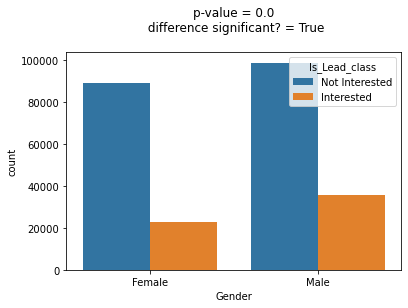

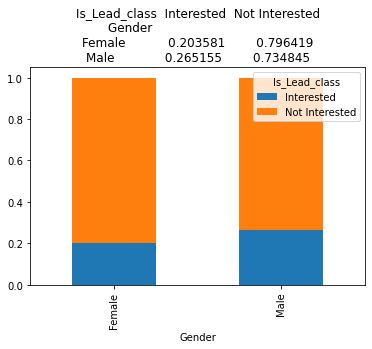

In [33]:
BVA_categorical_plot(df, 'Is_Lead_class', 'Gender')

$\underline{\textbf{Inferences}}$

It can be seen that there is a significant difference of 6% in Males and Females towards the Interest in cerdit cards. Males are more likely (by 6%) to shows interest in credit cards.

$\underline{\textbf{Result}}$

Hence, we can accept the null hypothesis that females are less likely (by 6%) to show interest in Credit cards.

$$\underline{\textbf{2. Are customers not active for last 3 months less likely to show interest in the Credit Cards?}}$$

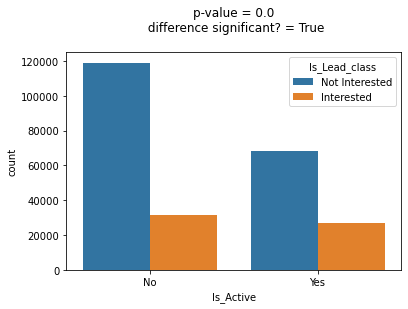

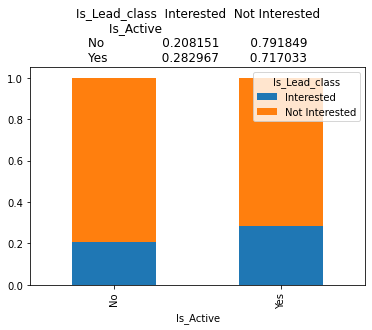

In [34]:
BVA_categorical_plot(df, 'Is_Lead_class', 'Is_Active')

$\underline{\textbf{Inferences}}$

It can be seen that there is a significant difference of 8% in Active and not active customers towards the Interest in credit cards. Active Customers are more likely (by 8%) to show interest in Credit cards. 

$\underline{\textbf{Result}}$

Hence, we can accept the null hypothesis that not active customers for last 3 months are less likely to show interest in credit cards.

$$\underline{\textbf{3. Does the Channel_code, play a role in the Interest of the customer in Credit card?}}$$

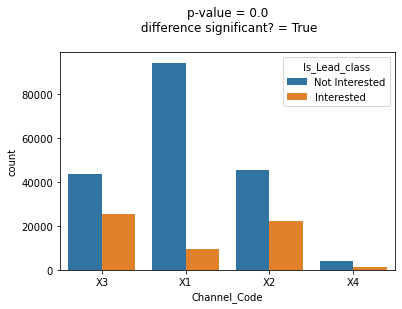

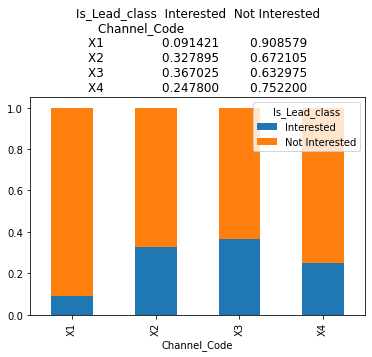

In [35]:
BVA_categorical_plot(df, 'Is_Lead_class', 'Channel_Code')

$\underline{\textbf{Inferences}}$

X3 channel has maximum percentage of customers (~ 37%) interested in Credit cards followed by X2 (~ 33%) and then X1 (~ 9%). Not considering X4 as it has less number of values.

$\underline{\textbf{Result}}$

Hence, we can reject the null hypothesis that Channel_code does not play any role in the interest of the customer towards credit cards.

$$\underline{\textbf{4. Does occupation effect the likeliness towards the interest in Credit Cards?}}$$

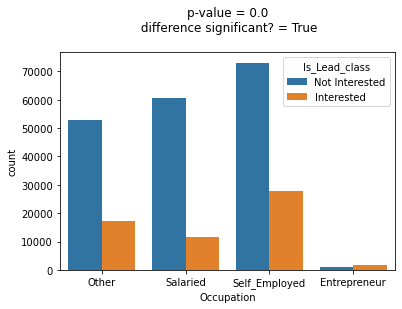

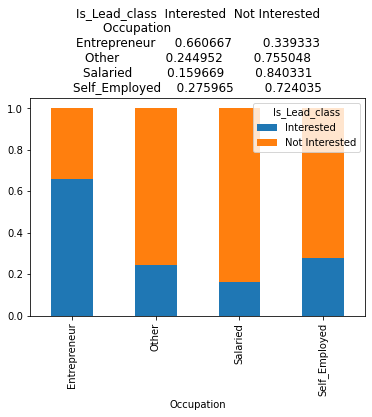

In [36]:
BVA_categorical_plot(df, 'Is_Lead_class', 'Occupation')

$\underline{\textbf{Inferences}}$

Entrepreneurs are highly interested in Credit Cards (~ 66%) followed by Self-employed (~ 28 %), Other (~ 24%) and salaried (~ 16%).

$\underline{\textbf{Result}}$

Hence, we can reject the null hypothesis that the occupation does not effect the interest of the customers towards credit cards.


$$\underline{\textbf{5. Does the Region_Code, play a role in the Interest of the customer in Credit card?}}$$

In [37]:
df['Region_Code'].value_counts(normalize = True)

RG268    0.146237
RG283    0.119711
RG254    0.109228
RG284    0.078624
RG277    0.052197
RG280    0.051989
RG269    0.031999
RG270    0.031417
RG261    0.031063
RG257    0.024829
RG251    0.024214
RG282    0.023722
RG274    0.021512
RG272    0.021373
RG281    0.020726
RG273    0.018301
RG252    0.017442
RG279    0.016181
RG263    0.015005
RG275    0.013206
RG260    0.012656
RG256    0.011586
RG264    0.011366
RG276    0.011248
RG259    0.010524
RG250    0.010158
RG255    0.008212
RG258    0.007940
RG253    0.007561
RG278    0.007415
RG262    0.007276
RG266    0.006422
RG265    0.006292
RG271    0.006275
RG267    0.006092
Name: Region_Code, dtype: float64

In [38]:
## Mapping as per the number of value counts of each region code

df['Region_grp'] = df['Region_Code'].map({'RG268':'R1', 'RG283':'R1', 'RG254':'R1', 'RG284':'R1', 'RG277':'R2',
                                         'RG280':'R2', 'RG269':'R2', 'RG270':'R2', 'RG261':'R2', 'RG257':'R2', 'RG251':'R2', 'RG282':'R2',
                                         'RG274':'R2', 'RG272':'R2', 'RG281':'R2', 'RG273':'R3', 'RG252':'R3', 'RG279':'R3', 'RG263':'R3', 'RG275':'R3', 'RG260':'R3', 'RG256':'R3',
                                         'RG264':'R4', 'RG276':'R4', 'RG259':'R4', 'RG250':'R4', 'RG255':'R4', 'RG258':'R4', 'RG253':'R4', 'RG278':'R4', 'RG262':'R4', 'RG266':'R4', 'RG265':'R4', 'RG271':'R4', 'RG267':'R4'})

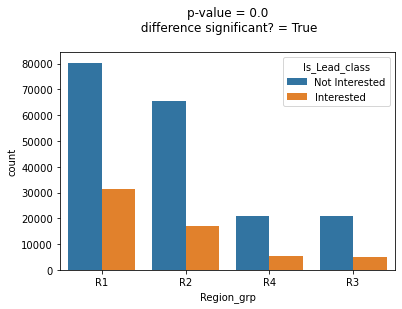

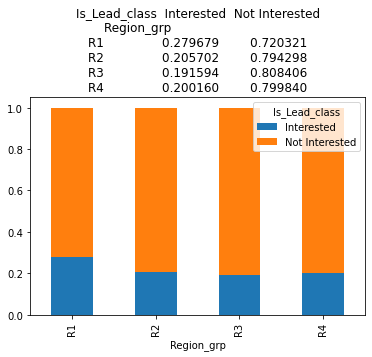

In [39]:
BVA_categorical_plot(df, 'Is_Lead_class', 'Region_grp')

$\underline{\textbf{Inferences}}$

R1 (~ 28%) has the highest rate of Interested Customers following with R2 (~ 21%), R3 and R4 have significantly lesser number of values than R1 and R2.

$\underline{\textbf{Result}}$

Hence, we can reject the null hypothesis that Region_Code does not a play a role in the interest of the customer towards Credit Cards.



$$\underline{\textbf{Missing Values}}$$


$$\underline{\textbf{6. Do the missing values in the Credit_Product column have some common behaviour with the interest in the Credit Card?}}$$

In [40]:
# isolating rows with missing Credit product

miss_credit_product = df[:]
miss_credit_product['missing_product'] = 'not_missing'
miss_credit_product['missing_product'][~miss_credit_product['Credit_Product'].isin(['No','Yes'])] = 'missing value'

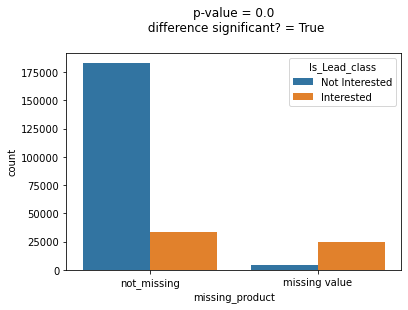

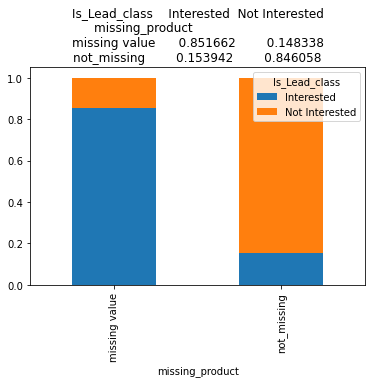

In [41]:
BVA_categorical_plot(miss_credit_product, 'Is_Lead_class', 'missing_product')

$\underline{\textbf{Inferences}}$

The missing values have significant effect on the interested customers. Although the missing values are comparatively less than the count of non-missing values. But the count of interested customers in missing and non-missing values is same. Also, the count of non-interested customers is highly different being more in the non-missing values category.

$\underline{\textbf{Result}}$

Hence, we can reject the null hypothesis that the missing values in the Credit_Product column has certain effect on the interest of the customers in Credit Card.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Missing Value Treatment</span>  </h1>

In [42]:
miss_info = df.isna().sum()/len(df) * 100

miss_info[miss_info > 0].sort_values(ascending = False)

Credit_Product    11.934073
dtype: float64

Thus, only one column ('Credit_Product') is having missing values. We have already seen that the customers with missing values (~ 85%, 24977 customers) in the 'Credit_Product' column have interest in credit card

In [44]:
df['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

$$\underline{\textbf{Replacing with a Random value from the "Same-Column in the Same-Proportion}}$$

In [45]:
def imput_cat_random_val(col_value):
    N = len(col_value)                       ## calculates the number of values in the columns
    val_prop = col_value.value_counts(normalize = True)
    lbl = val_prop.index.tolist()        # Splitting the label information from the dataframe
    prob = val_prop.values                # Splitting for the values from the DataFrame
    imput_val = np.random.choice(lbl, p = prob, size = N)    # Selects a random value from a list of size N and probability 'p'
    out = col_value.fillna(pd.Series(imput_val))
    
    return (out)

In [46]:
df['Credit_Product'] = imput_cat_random_val(col_value = df['Credit_Product'])

In [47]:
df['Credit_Product'].value_counts()

No     163989
Yes     81736
Name: Credit_Product, dtype: int64

In [49]:
df['Credit_Product'].isna().sum()   

0

Missing values are now imputed with the proporation of 'Yes' and 'No' in the column.

<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Outlier Treatment</span>  </h1> 

In [50]:
## From the function defined above (UVA_Outlier), we take the part where the Outliers get removed

## And define another function

def outlier_remove(data, col_group, threshold = 1.5):
    for i in col_group:

        q1= data[i].quantile(0.25)
        q3= data[i].quantile(0.75)
        IQR = q3 - q1
        whis_low = q1-(threshold*IQR)
        whis_high = q3+(threshold*IQR)
        data[i][data[i]>whis_high] = whis_high
        data[i][data[i]<whis_low] = whis_low

In [52]:
outlier_remove(df, ['Avg_Account_Balance'])

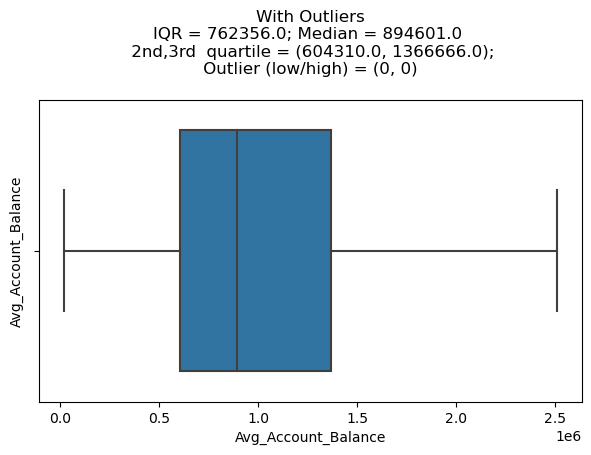

In [54]:
UVA_outlier(df, ['Avg_Account_Balance'], include_outlier = True)    # Just to confirm if our outliers are removed

Hence, the outlier gets removed from the 'Avg_Account_Balance' column.